# Data Science Capstone Two Project: Ecommerce Fraud Data

### Project Description

* Checking for similarities/correlations between potentially fradulent customers


### Data Source

* The Datasets consists of 2 csv files both containing information on ecommerce transactions made by customers.
* To detect Fraud using this data one needs to perform proper EDA and feature engineering to obtain good results. 
* Data Retrieved November 04, 2011 from (https://www.kaggle.com/aryanrastogi7767/ecommerce-fraud-data)

In [1]:
#Import python libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the Data 
datapath = '../data/summary_data_cleaned.csv'

df = pd.read_csv('../data/summary_data_cleaned.csv', index_col=0)

df

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,State
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,CA
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,CA
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,NM
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,NM
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,KS
815,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,KS
816,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,KS
817,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,KS


In [3]:
print(df.shape, df.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 818
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     623 non-null    object
 1   transactionId                     623 non-null    object
 2   orderId                           623 non-null    object
 3   paymentMethodId                   623 non-null    object
 4   paymentMethodRegistrationFailure  623 non-null    int64 
 5   paymentMethodType                 623 non-null    object
 6   paymentMethodProvider             623 non-null    object
 7   transactionAmount                 623 non-null    int64 
 8   transactionFailed                 623 non-null    int64 
 9   orderState                        623 non-null    object
 10  customerPhone                     623 non-null    object
 11  customerDevice                    623 non-null    object
 12  customerIPAddress     

## Part II. EDA


In [4]:
# Called describe() method to gather key statistics on the df. 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
paymentMethodRegistrationFailure,623.0,0.131621,0.338350,0.0,0.0,0.0,0.0,1.0
transactionAmount,623.0,34.598716,20.360247,10.0,21.0,34.0,45.0,353.0
transactionFailed,623.0,0.269663,0.444141,0.0,0.0,0.0,1.0,1.0
No_Transactions,623.0,5.841091,2.735167,1.0,4.0,5.0,7.0,15.0
No_Orders,623.0,4.197432,1.643811,1.0,3.0,4.0,5.0,8.0
No_Payments,623.0,2.402889,2.001557,1.0,1.0,2.0,3.0,15.0


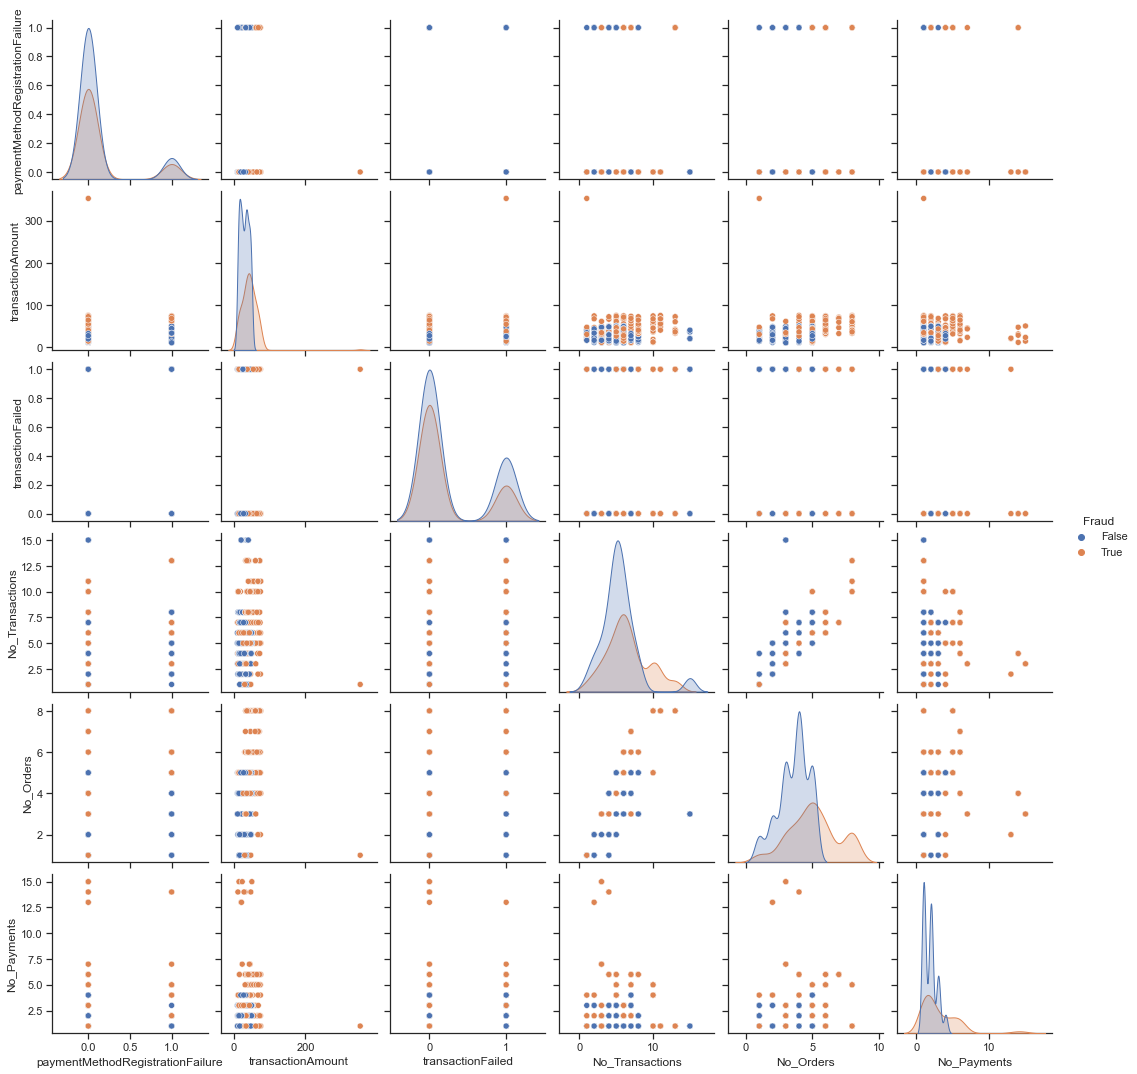

In [5]:
#Viziualize fraud distribution 

import seaborn as sns

sns.set_theme(style="ticks")

sns.pairplot(df, hue="Fraud")


In [6]:
# Used the groupby() method to check mean distribution of fraud in df.
mean = df.groupby(by='Fraud').mean().T
mean

Fraud,False,True
paymentMethodRegistrationFailure,0.122951,0.143969
transactionAmount,29.049180,42.501946
transactionFailed,0.295082,0.233463
No_Transactions,5.398907,6.470817
No_Orders,3.584699,5.070039
No_Payments,1.841530,3.202335


In [7]:
# Used the groupby() method to check std distribution of fraud in df.
df.groupby(by='Fraud').std().T


Fraud,False,True
paymentMethodRegistrationFailure,0.328830,0.351743
transactionAmount,12.027265,26.348050
transactionFailed,0.456704,0.423860
No_Transactions,2.573713,2.838100
No_Orders,1.140625,1.846385
No_Payments,0.877120,2.746787


In [8]:
correlations = df.corr()

correlations.style.background_gradient(cmap='coolwarm')

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,Fraud
paymentMethodRegistrationFailure,1.000000,0.041753,-0.001202,0.076491,0.103515,-0.076055,0.030605
transactionAmount,0.041753,1.000000,0.002385,0.126082,0.287085,0.079404,0.325534
transactionFailed,-0.001202,0.002385,1.000000,0.236494,-0.031201,-0.060920,-0.068354
No_Transactions,0.076491,0.126082,0.236494,1.000000,0.661004,-0.034393,0.193082
No_Orders,0.103515,0.287085,-0.031201,0.661004,1.000000,0.156094,0.445186
No_Payments,-0.076055,0.079404,-0.060920,-0.034393,0.156094,1.000000,0.334962
Fraud,0.030605,0.325534,-0.068354,0.193082,0.445186,0.334962,1.000000


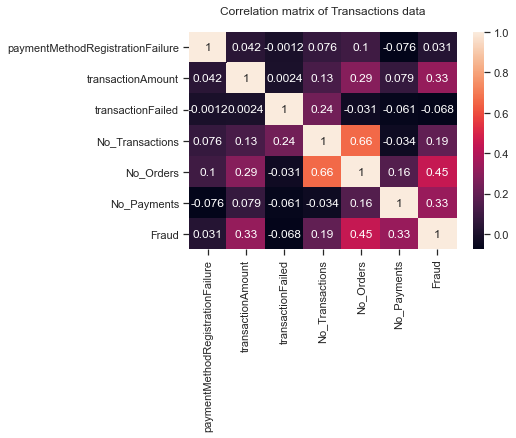

<Figure size 432x288 with 0 Axes>

In [9]:
import seaborn as sns

hm = sns.heatmap(correlations, annot = True)

hm.set (title = "Correlation matrix of Transactions data\n")

plt.show()

plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [10]:
fraud = df.groupby(by='Fraud').sum()

failedovertotal = (fraud['transactionFailed']/ fraud['No_Orders'])*100

fraudcount = df.Fraud[df['Fraud']==True].count()

totaltransactions = df.No_Orders.count()

totalorders = df.No_Orders.sum()

fraudovertrans =  fraudcount/totaltransactions *100

fraudoverorders = fraudcount/totalorders *100


print(" Fraud Instanses:", fraudcount,'\n', 
      "Total Transactions:", totaltransactions,'\n',
      "Total Orders:", totalorders,'\n', 
      "% of Fraud over total transactions:", round(fraudovertrans,2),'%','\n',
      "% of Fraud over total orders:",round(fraudoverorders, 2),'%')

#print(fraud['No_Orders'],fraud['transactionFailed'], failedovertotal, fraudovertotal)


 Fraud Instanses: 257 
 Total Transactions: 623 
 Total Orders: 2615 
 % of Fraud over total transactions: 41.25 % 
 % of Fraud over total orders: 9.83 %


In [11]:
#Let's isolate fraud df

fraud = df[df['Fraud'] == True]

#Let's explore different payment types used 

payment_types = df['paymentMethodType'].unique()

payment_types



array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

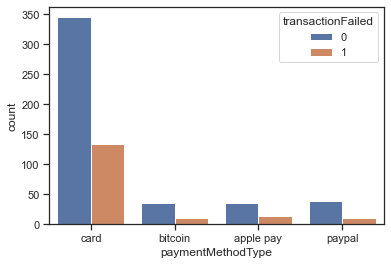

In [12]:
#Let's now see frequency of payment type and failed transactions 
ax = sns.countplot(x=df['paymentMethodType'], hue=df['transactionFailed'], data=df)



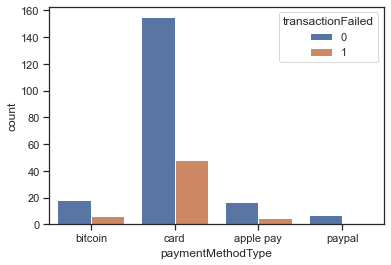

In [13]:
#Let's now see what is distribution of Fraud by payment type 

ax = sns.countplot(x=fraud['paymentMethodType'], hue=fraud['transactionFailed'], data=fraud)


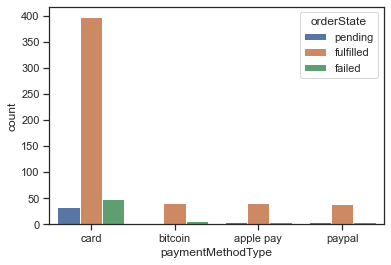

In [14]:
#Let's now see distribution of order status

ax = sns.countplot(x=df['paymentMethodType'], hue = df['orderState'], data=df)


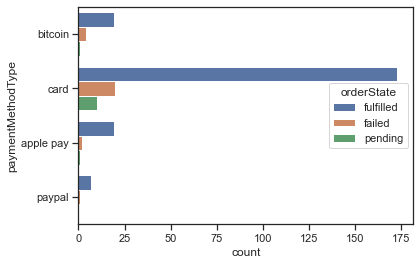

In [15]:
#Let's now see distribution of order status in fradulent orders

ax = sns.countplot(y=fraud['paymentMethodType'], hue = fraud['orderState'], data=fraud)

In [16]:
#Now let's review our payment providers
payment_providers = df['paymentMethodProvider'].unique()
payment_providers

array(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], dtype=object)

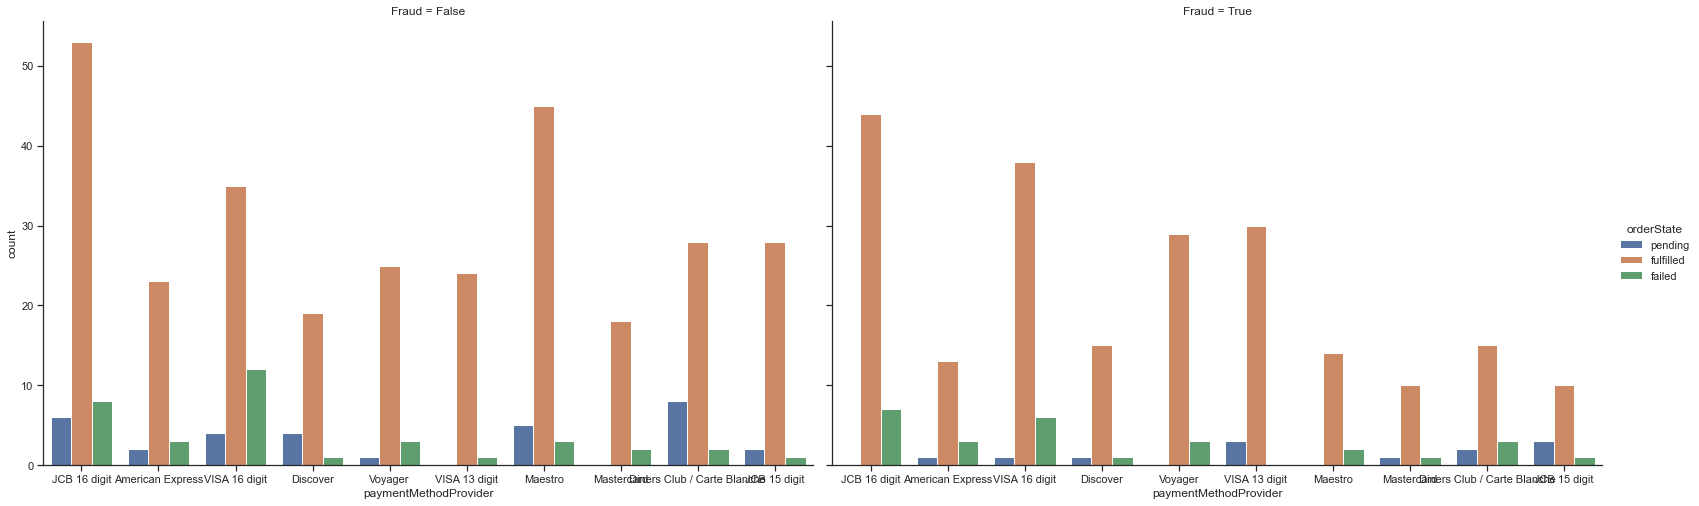

In [17]:
#Now let's review our payment providers for fraudelent orders as opposed to entire dataset on order status

ax = sns.catplot(x='paymentMethodProvider', hue = 'orderState', col='Fraud', data=df, kind="count", height=7, aspect=1.6)


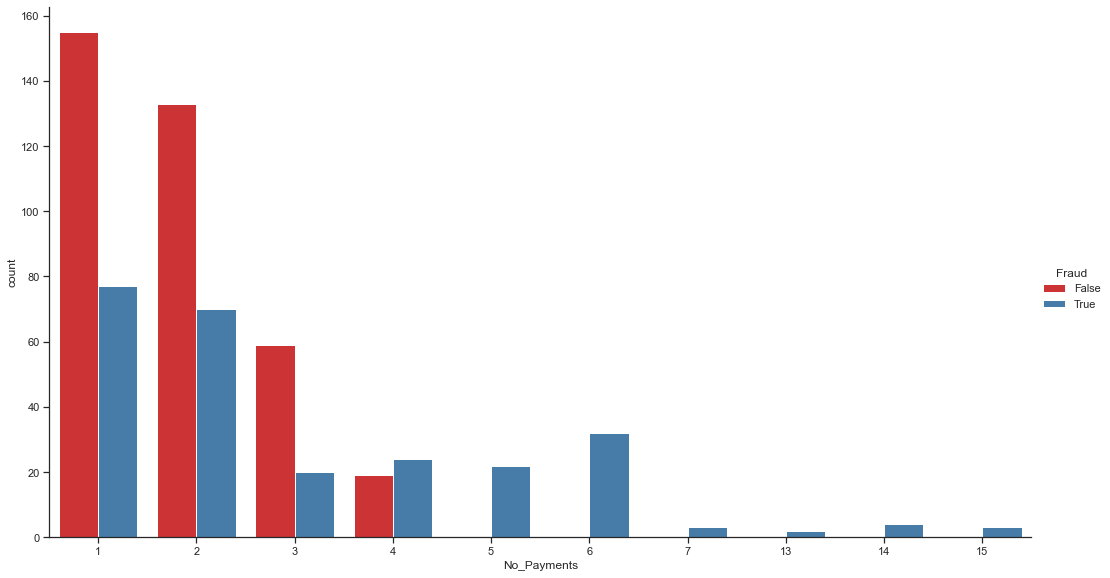

In [18]:
#Now let's review our payment providers for fraudelent orders as opposed to entire dataset on order status

ax = sns.catplot(x='No_Payments', hue = 'Fraud', data=df, kind="count", palette= "Set1", height=8, aspect=1.8)

plt.savefig("FraudFreqPlot.jpg")

##### It looks like a correlation that we have observed earlier is strong enough to suggest that all payments over 4 are Fradulent


In [19]:
#Sort fraud cases by State

fraud_by_State = df.State[df["Fraud"] == True]

fraud_by_State_values = fraud_by_State.value_counts()

fraud_by_State.describe()


count     252
unique     36
top        WI
freq       28
Name: State, dtype: object

In [20]:
#Sort fraud cases by State

fraud_by_State = df.State[df["Fraud"] == True]

fraud_by_State_values = fraud_by_State.value_counts()

fraud_by_State.describe()




count     252
unique     36
top        WI
freq       28
Name: State, dtype: object

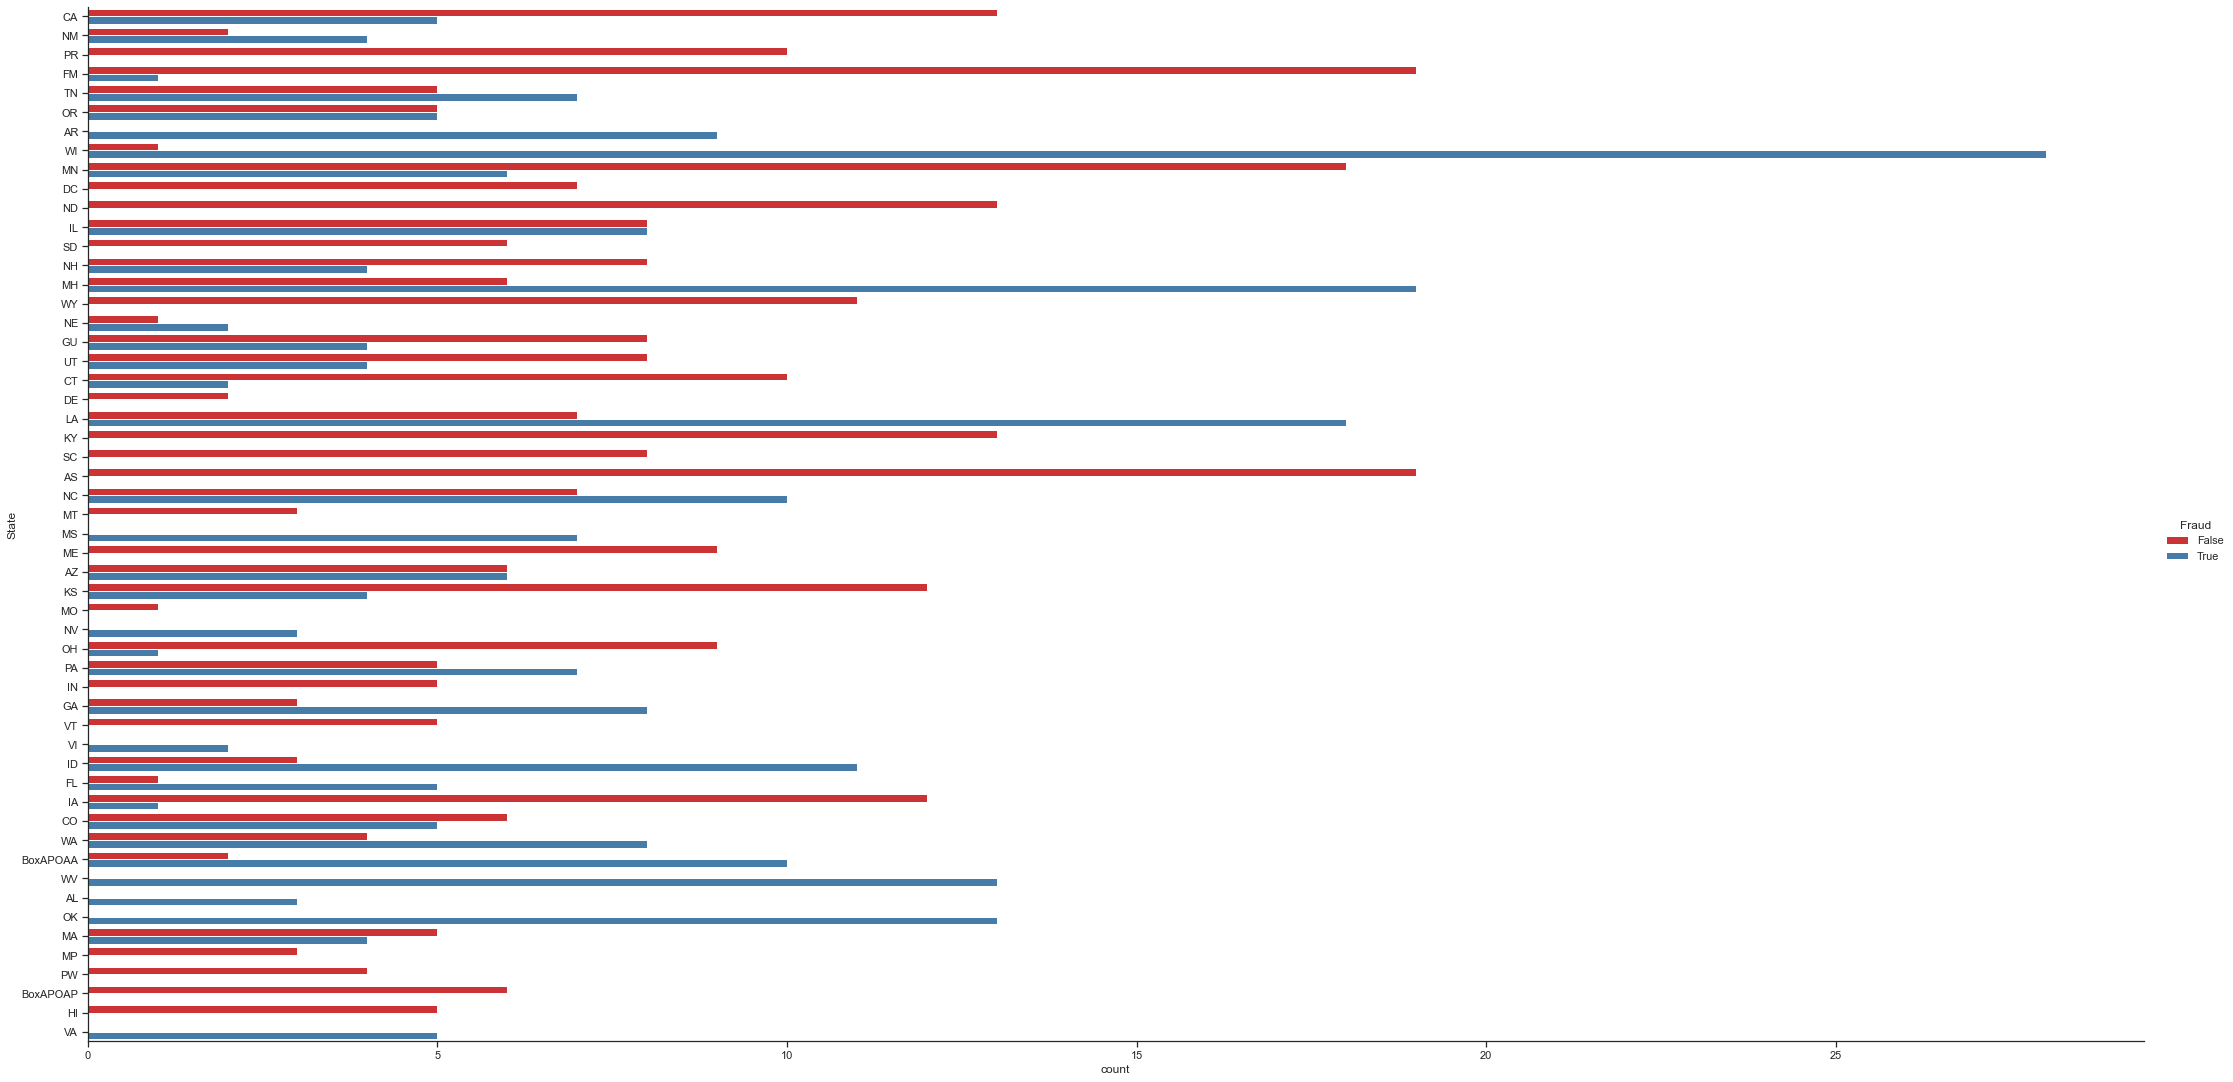

In [21]:
#Fraud by State histogram

ax = sns.catplot(y='State', hue = 'Fraud', data=df, kind="count", palette= 'Set1', height=15, aspect=2)

plt.savefig("FraudbyStatePlot.jpg")


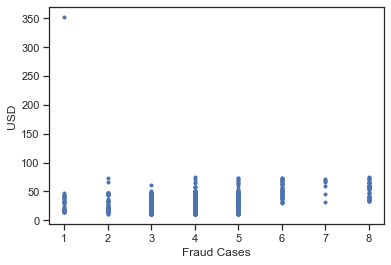

In [22]:
#Review overall distribtion using a scatter plot

_ = plt.plot( df['No_Orders'],df['transactionAmount'],
marker='.', linestyle='none')

_ = plt.xlabel('Fraud Cases')

_ = plt.ylabel('USD')

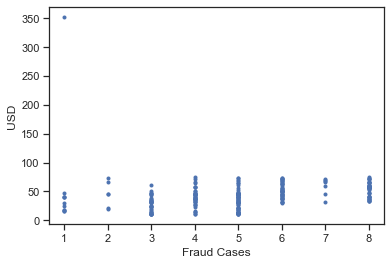

In [23]:
#Review Fraud amounts per case distribtion using a scatter plot

df_fraud = df[df['Fraud'] == True]

_ = plt.plot(df_fraud['No_Orders'], df_fraud['transactionAmount'], marker='.', linestyle='none')

_ = plt.xlabel('Fraud Cases')

_ = plt.ylabel('USD')

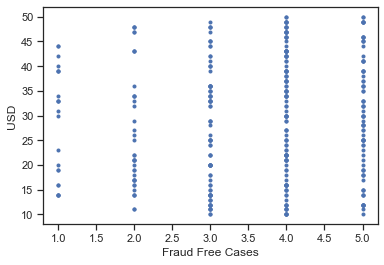

In [24]:
#Review Fraud free orders distribtion using a scatter plot

df_fraud_free = df[df['Fraud'] == False]

_ = plt.plot(df_fraud_free['No_Orders'], df_fraud_free['transactionAmount'], marker='.', linestyle='none')

_ = plt.xlabel('Fraud Free Cases')

_ = plt.ylabel('USD')

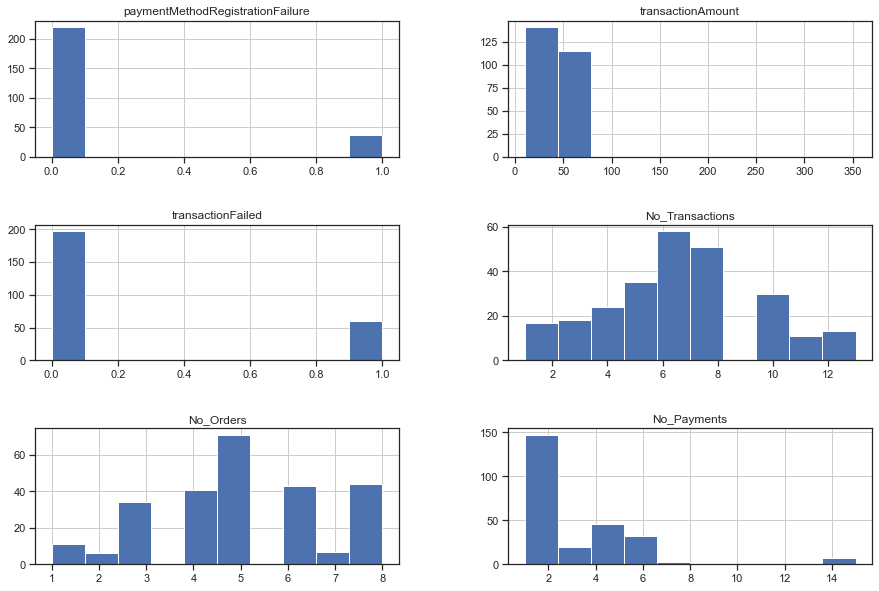

In [25]:
#Call fraud dataframe's `hist` method to plot histograms of each of the numeric features

df_fraud.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

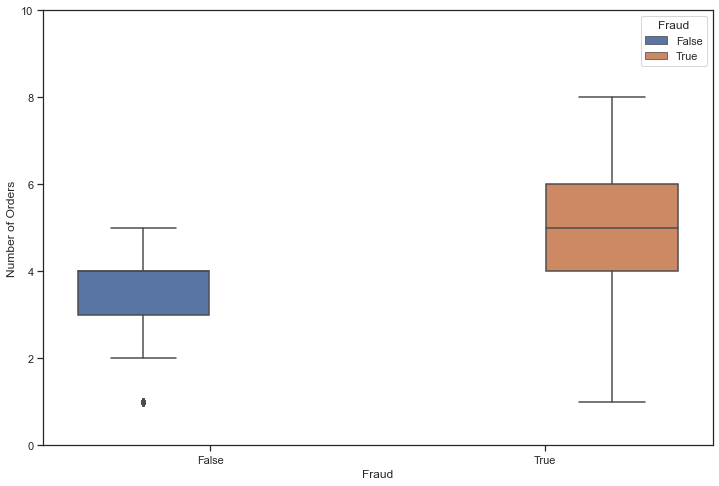

In [26]:
# Call the boxplot() method on our df.
# Set the parameters: by = 'Fraud' and column = ['No_Orders'].

#df.boxplot(by='Fraud', column = ['transactionAmount'])

#Creates a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
_ = sns.boxplot(x='Fraud', y='No_Orders', hue='Fraud', data=df)
_.set(ylim=(0, 10))

plt.ylabel('Number of Orders')

plt.xlabel('Fraud')

plt.savefig("FraudBoxPlot.jpg")

## Part III. Preprocessing and Training Data Development

In [27]:
# To find the correlation among
# the columns using pearson method

df.corr(method ='pearson')

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,Fraud
paymentMethodRegistrationFailure,1.000000,0.041753,-0.001202,0.076491,0.103515,-0.076055,0.030605
transactionAmount,0.041753,1.000000,0.002385,0.126082,0.287085,0.079404,0.325534
transactionFailed,-0.001202,0.002385,1.000000,0.236494,-0.031201,-0.060920,-0.068354
No_Transactions,0.076491,0.126082,0.236494,1.000000,0.661004,-0.034393,0.193082
No_Orders,0.103515,0.287085,-0.031201,0.661004,1.000000,0.156094,0.445186
No_Payments,-0.076055,0.079404,-0.060920,-0.034393,0.156094,1.000000,0.334962
Fraud,0.030605,0.325534,-0.068354,0.193082,0.445186,0.334962,1.000000


In [28]:
#Create dummy variables for PaymentMethodType using Onehot encoder

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['paymentMethodType', 'orderState', 'paymentMethodProvider']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

#view final df
print(final_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 818
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customerEmail                     623 non-null    object 
 1   transactionId                     623 non-null    object 
 2   orderId                           623 non-null    object 
 3   paymentMethodId                   623 non-null    object 
 4   paymentMethodRegistrationFailure  623 non-null    int64  
 5   paymentMethodType                 623 non-null    object 
 6   paymentMethodProvider             623 non-null    object 
 7   transactionAmount                 623 non-null    int64  
 8   transactionFailed                 623 non-null    int64  
 9   orderState                        623 non-null    object 
 10  customerPhone                     623 non-null    object 
 11  customerDevice                    623 non-null    object 
 12  customer

In [29]:
# Rename column names

final_df['PaypalPayments'] = final_df.iloc[:,19] 
final_df['ApplePayments']= final_df.iloc[:,20] 
final_df['CardPayments']= final_df.iloc[:,21] 
final_df['BitcoinPayments']= final_df.iloc[:,22]
final_df['OrdersFulfilled'] = final_df.iloc[:,23]
final_df['OrdersPending'] = final_df.iloc[:,24]
final_df['OrdersFailed'] = final_df.iloc[:,25]
final_df['JCB_16'] = final_df.iloc[:,26]
final_df['AmericanExp'] = final_df.iloc[:,27]
final_df['VISA_16'] =  final_df.iloc[:,28]
final_df['Discover'] = final_df.iloc[:,29]
final_df['Voyager'] = final_df.iloc[:,30]
final_df['VISA_13'] = final_df.iloc[:,31]
final_df['Maestro'] = final_df.iloc[:,32]
final_df['Mastercard'] = final_df.iloc[:,33]
final_df['DC_CB'] = final_df.iloc[:,34] 
final_df['JCB_15'] = final_df.iloc[:,35]

df1 = final_df

In [30]:
df1 = df1.drop(df1.columns[[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]],axis = 1)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 818
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customerEmail                     623 non-null    object 
 1   transactionId                     623 non-null    object 
 2   orderId                           623 non-null    object 
 3   paymentMethodId                   623 non-null    object 
 4   paymentMethodRegistrationFailure  623 non-null    int64  
 5   paymentMethodType                 623 non-null    object 
 6   paymentMethodProvider             623 non-null    object 
 7   transactionAmount                 623 non-null    int64  
 8   transactionFailed                 623 non-null    int64  
 9   orderState                        623 non-null    object 
 10  customerPhone                     623 non-null    object 
 11  customerDevice                    623 non-null    object 
 12  customer

In [32]:
#check for missing values in final df

missing_values = df1.isna().sum()
missing_values

customerEmail                         0
transactionId                         0
orderId                               0
paymentMethodId                       0
paymentMethodRegistrationFailure      0
paymentMethodType                     0
paymentMethodProvider                 0
transactionAmount                     0
transactionFailed                     0
orderState                            0
customerPhone                         0
customerDevice                        0
customerIPAddress                     0
customerBillingAddress                0
No_Transactions                       0
No_Orders                             0
No_Payments                           0
Fraud                                 0
State                                47
PaypalPayments                      196
ApplePayments                       196
CardPayments                        196
BitcoinPayments                     196
OrdersFulfilled                     196
OrdersPending                       196


In [33]:
#Fill Missing Values
#fill dummies for encoded dummies
#fill N/A for 'State'

df1['State'] = df1['State'].fillna('N/A')

df1[['PaypalPayments', 'ApplePayments','CardPayments','BitcoinPayments', 'OrdersFulfilled', 'OrdersPending','OrdersFailed','JCB_16','AmericanExp','VISA_16','Discover','Voyager','VISA_13','Maestro' ,'Mastercard','DC_CB','JCB_15']] = df1[['PaypalPayments', 'ApplePayments','CardPayments','BitcoinPayments', 'OrdersFulfilled', 'OrdersPending','OrdersFailed','JCB_16','AmericanExp','VISA_16','Discover','Voyager','VISA_13','Maestro' ,'Mastercard','DC_CB','JCB_15']].fillna(0)

missing_values1 = df1.isna().sum()

missing_values1


customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
State                               0
PaypalPayments                      0
ApplePayments                       0
CardPayments                        0
BitcoinPayments                     0
OrdersFulfilled                     0
OrdersPending                       0
OrdersFailed                        0
JCB_16      

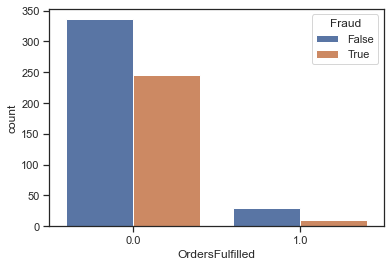

In [34]:
#Review fullfilled orders for Fraud detection
x = sns.countplot(x = df1['OrdersFulfilled'], hue = df1['Fraud'])
plt.show()

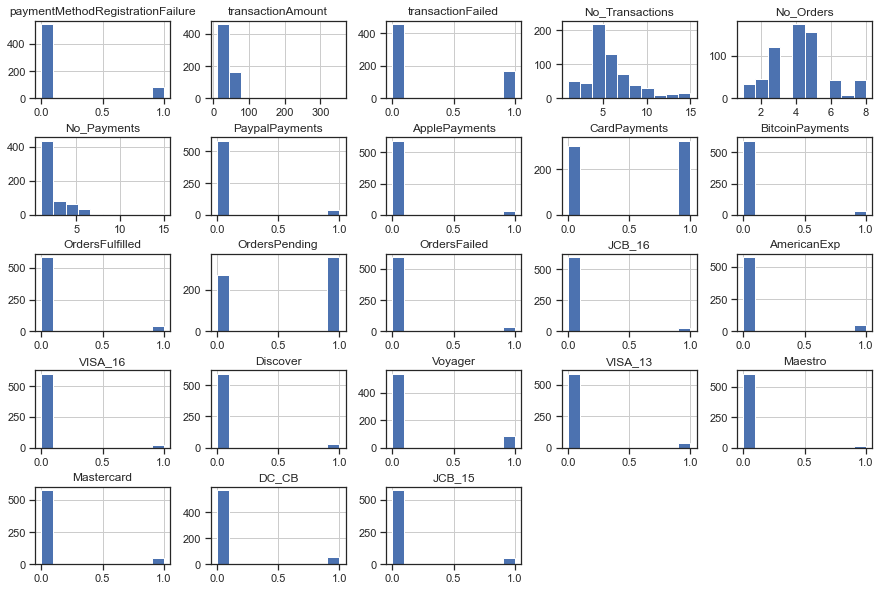

In [35]:
#Look at the distributions in final df

df1.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

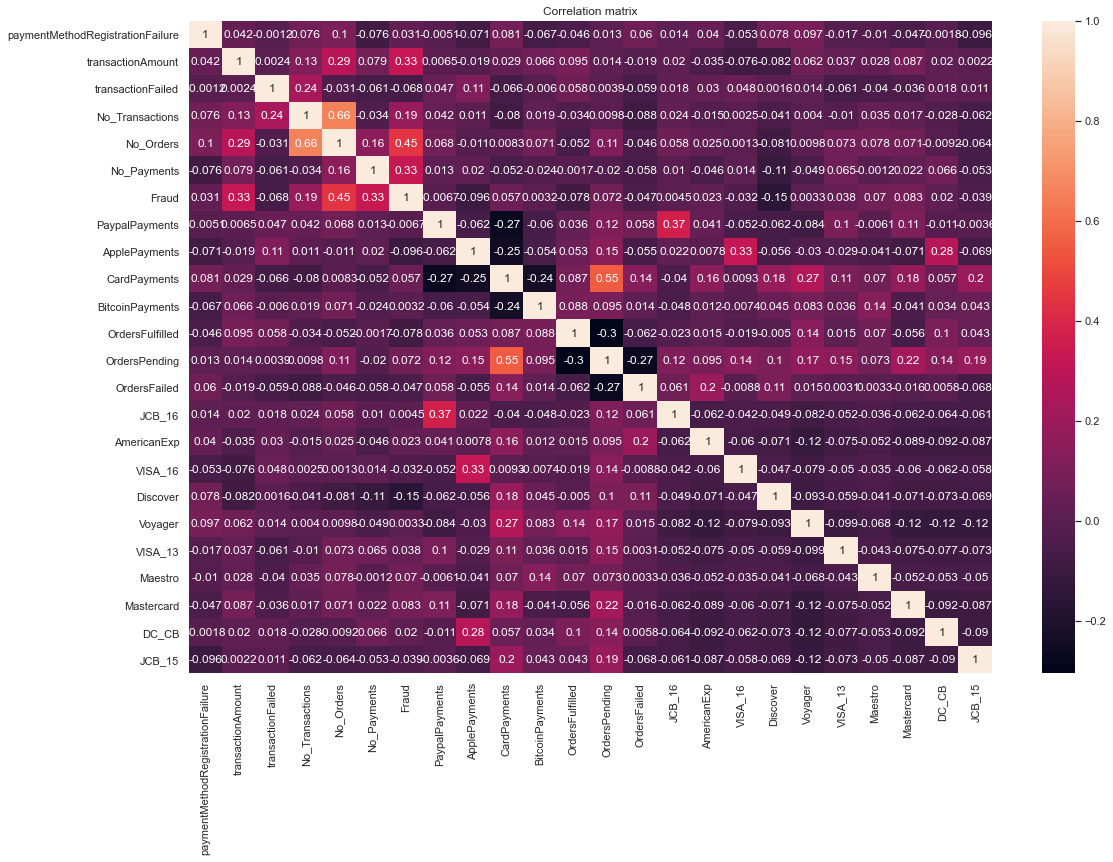

<Figure size 1296x864 with 0 Axes>

In [36]:
#Look at the corr in Final df
correlations2 = df1.corr()

_ = sns.set(rc = {'figure.figsize':(18,12)})

_ = sns.heatmap(correlations2, annot = True)

_.set (title = "Correlation matrix")

plt.show()

plt.savefig("CorrelationMatrix.jpg")


In [37]:
# save the data to a new csv file
datapath1 = '../data/summary_data_processed.csv'

df1.to_csv(datapath1)